# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [ ]:
# if plotnine is not installed in Jupter then use the following command to install it 


Running this project require the following imports 

In [3]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage



%matplotlib inline

In [11]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    plt.rcParams['figure.figsize'] = [10,3]
    color = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#00FFFF', '#FF00FF', '#800000', '#008000', '#000080', '#808000', '#008080', '#800080',
              '#FFA07A', '#00FA9A', '#ADD8E6', '#F0E68C', '#87CEEB', '#D8BFD8', '#FFD700', '#FF69B4', '#CD5C5C', '#90EE90', '#FF6347', '#DA70D6',
              '#FFC0CB', '#40E0D0', '#EEE8AA', '#1E90FF', '#FFA500', '#7B68EE', '#FF7F50', '#00BFFF', '#BA55D3', '#8FBC8F', '#FF4500', '#DAA520',
              '#DC143C', '#4169E1', '#B22222', '#32CD32', '#DB7093', '#9ACD32', '#9370DB', '#FF8C00', '#9932CC', '#8B0000', '#2E8B57', '#FF1493',
              '#20B2AA', '#FF69B4', '#FFDEAD', '#D2B48C', '#00CED1', '#FF00FF', '#00BFFF', '#BC8F8F', '#FFDAB9', '#6B8E23', '#FFC8B4', '#4682B4',
              '#B0C4DE', '#C71585', '#87CEFA', '#A52A2A', '#BDB76B', '#E6E6FA', '#00FA9A', '#E0FFFF', '#8B008B', '#FFB6C1', '#D8BFD8', '#F0F8FF',
              '#ADFF2F', '#EEE8AA', '#F4A460', '#B22222', '#6A5ACD', '#FFFACD', '#D2691E', '#7CFC00', '#FFA07A', '#FA8072', '#9932CC', '#FF00FF',
              '#FFEFD5', '#DB7093', '#00FF7F', '#00FFFF', '#FFD700', '#20B2AA', '#8B4513', '#87CEEB', '#4169E1', '#FF7F50', '#2F4F4F', '#FF8C00',
              '#40E0D0', '#00FF00', '#FFC0CB', '#FF69B4', '#8A2BE2', '#32CD32', '#9ACD32', '#FF0000', '#BA55D3', '#1E90FF', '#9370DB', '#F0E68C',
              '#FAEBD7', '#B0C4DE', '#7B68EE', '#D2B48C', '#48D1CC', '#C0C0C0', '#008080', '#000080', '#808000', '#008000', '#800000', '#000000']
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            if (hasattr(km, 'cluster_centers_')):
                plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 's', s = 100)
    plt.show();

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



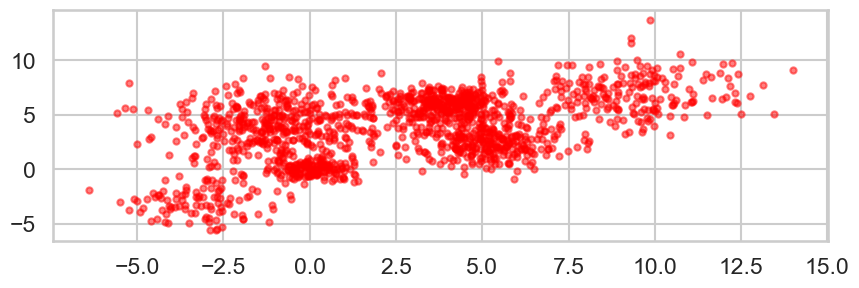

In [12]:
plt.rcParams['figure.figsize'] = [10,3]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

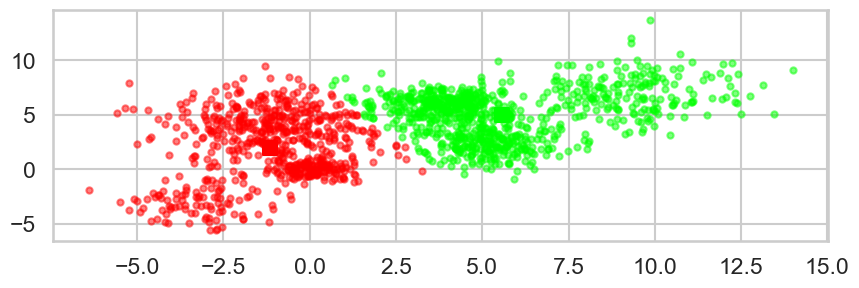

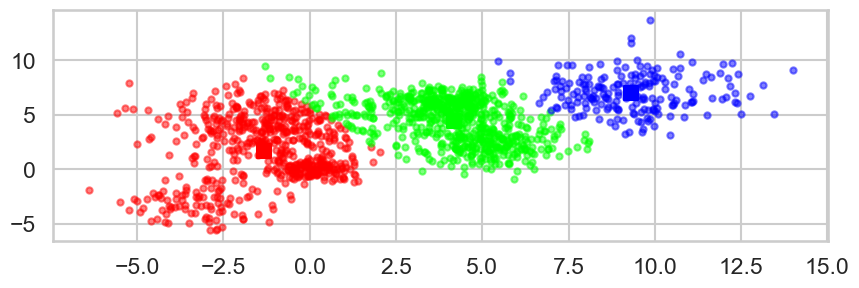

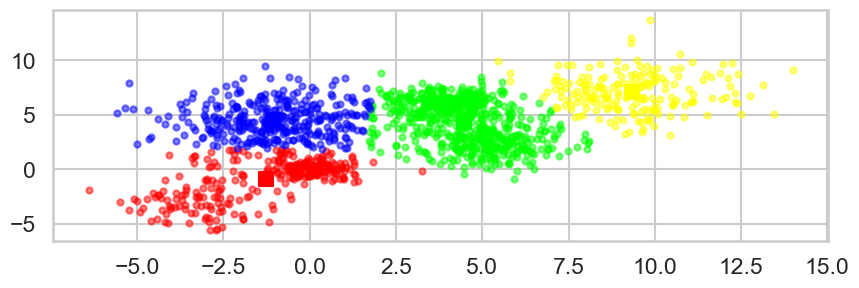

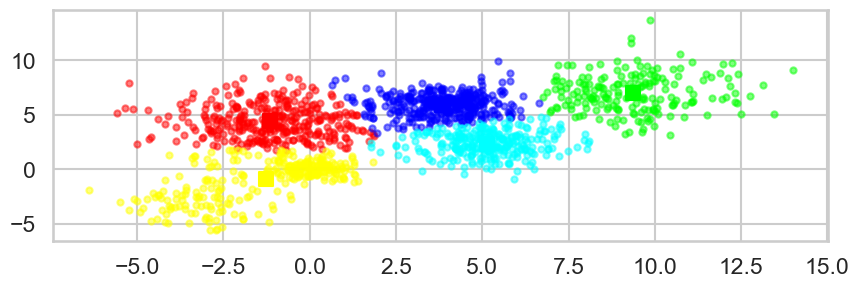

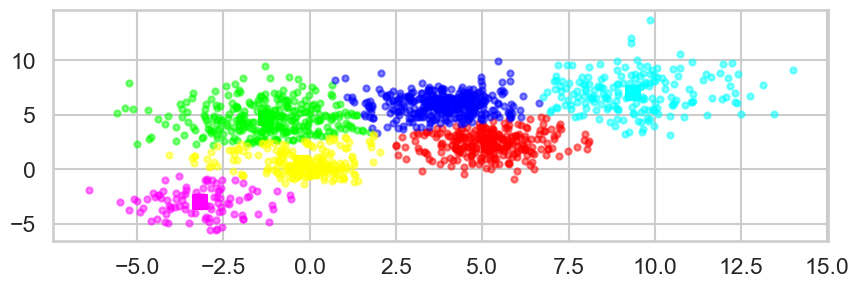

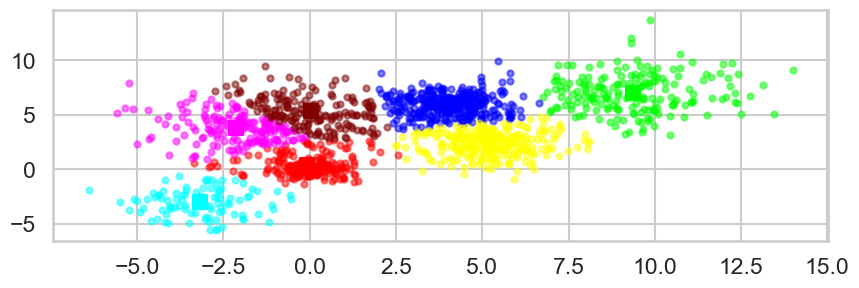

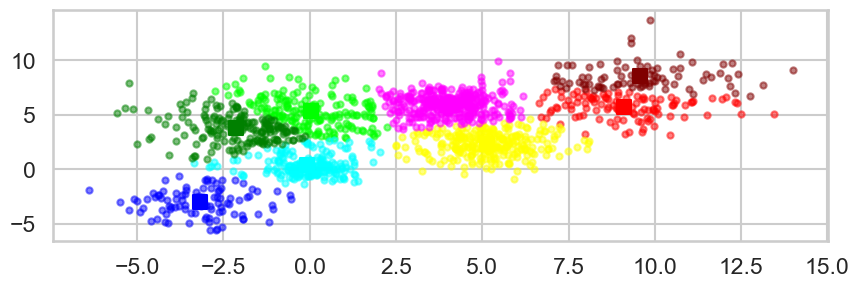

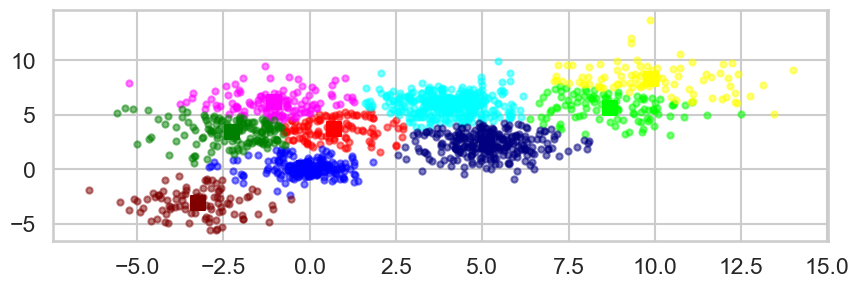

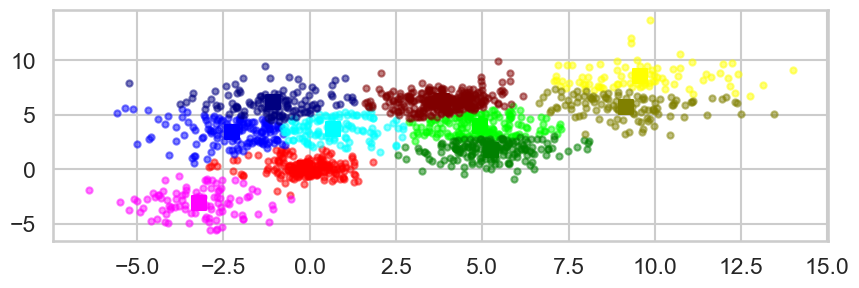

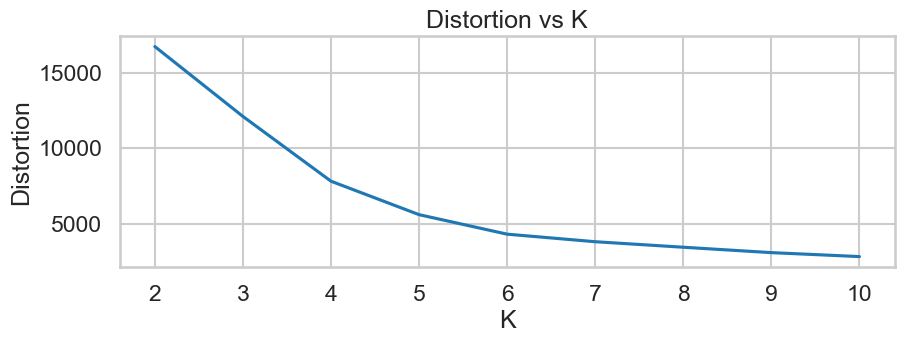

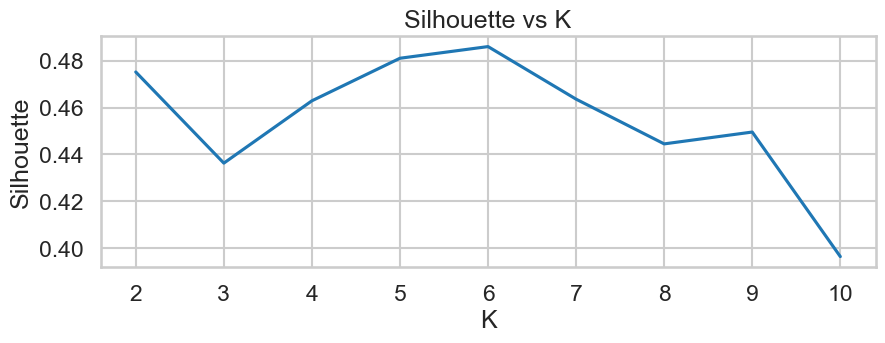

Best K: 6, Best Silhouette: 0.4859737366910219


In [9]:
X=Multi_blob_Data
distortion_values = []
silhouette_values = []
no_of_clusters=range(2, 11)

for K in range(2, 11):
    kmeans = KMeans(n_clusters=K)
    kmeans.fit(X)
    distortion_values.append(kmeans.inertia_)
    silhouette_values.append(silhouette_score(X, kmeans.labels_))
    display_cluster(X,km=kmeans,num_clusters=K)
    
plt.figure()
plt.plot(range(2, 11), distortion_values)
plt.xlabel("K")
plt.ylabel("Distortion")
plt.title("Distortion vs K")
plt.show()

plt.figure()
plt.plot(range(2, 11), silhouette_values)
plt.xlabel("K")
plt.ylabel("Silhouette")
plt.title("Silhouette vs K")
plt.show()

best_K = no_of_clusters[np.argmax(silhouette_values)]
best_silhouette = silhouette_values[np.argmax(silhouette_values)]
print(f"Best K: {best_K}, Best Silhouette: {best_silhouette}")

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

16


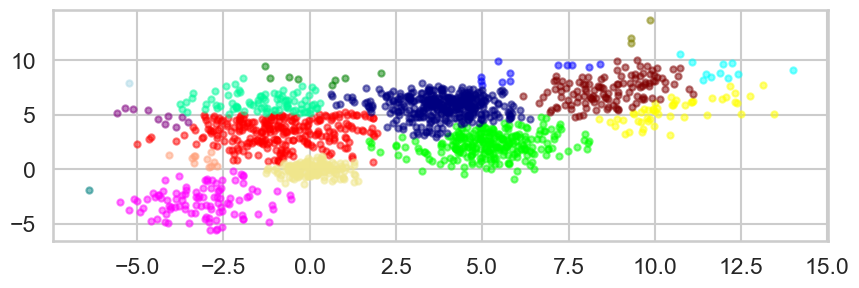

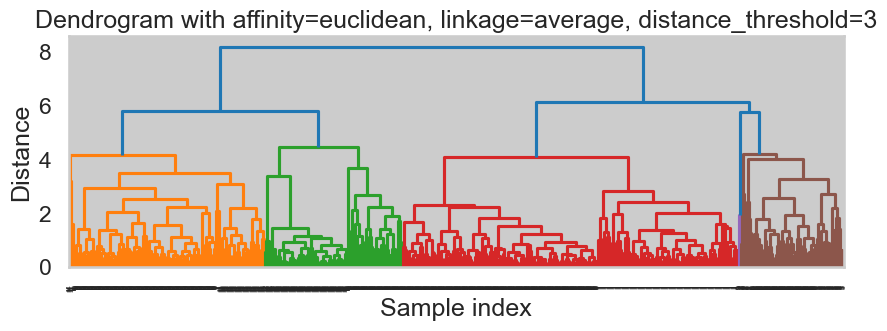

Silhouette score with affinity=euclidean, linkage=average, distance_threshold=3: 0.355
10


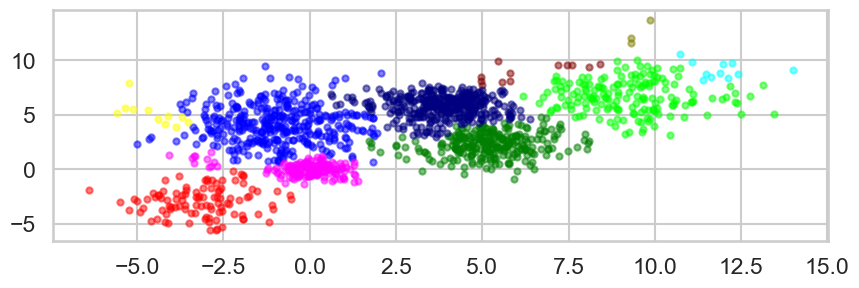

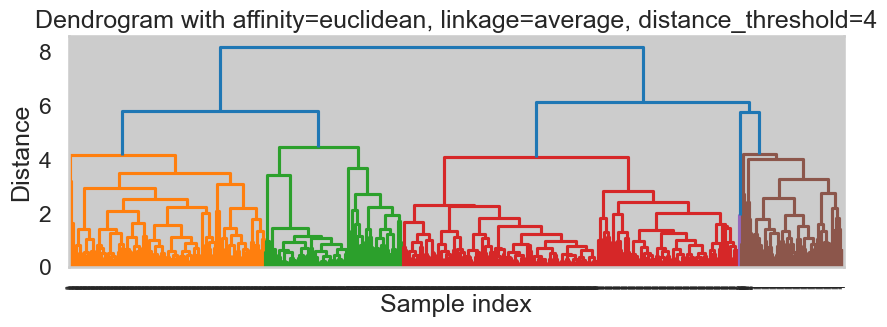

Silhouette score with affinity=euclidean, linkage=average, distance_threshold=4: 0.374
5


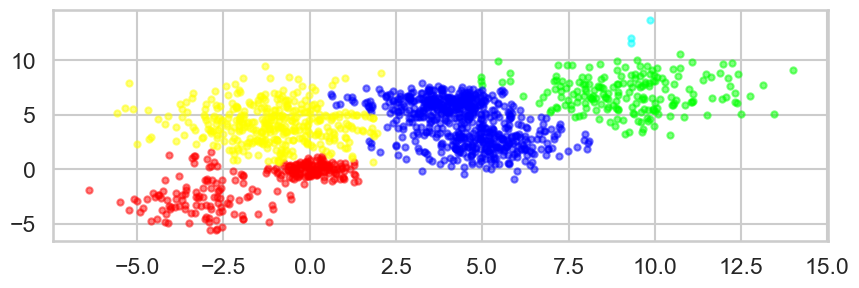

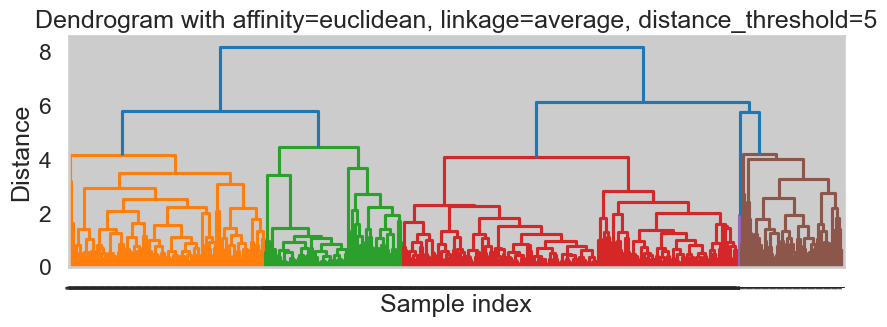

Silhouette score with affinity=euclidean, linkage=average, distance_threshold=5: 0.433
1


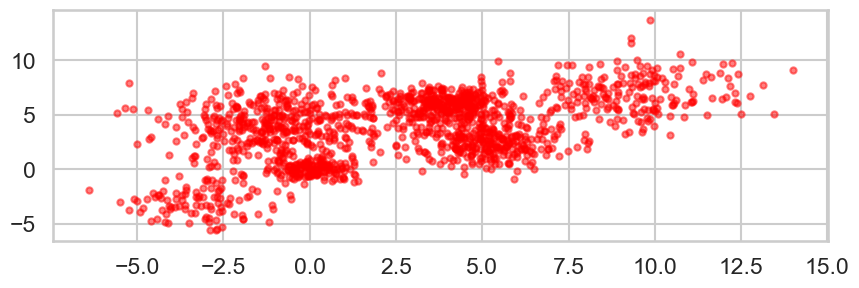

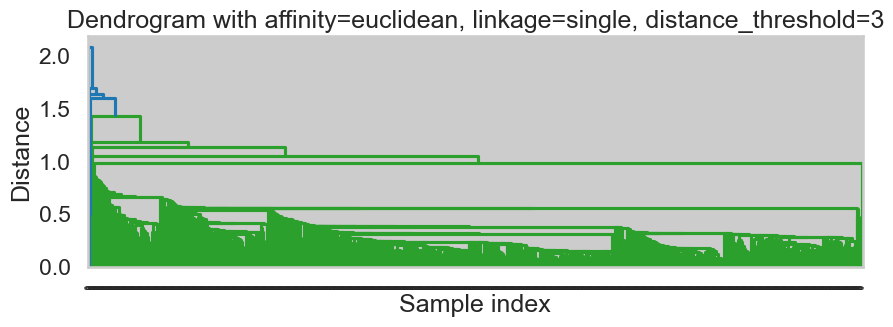

There is only 1 label for affinity=euclidean, linkage=single, distance_threshold=3
1


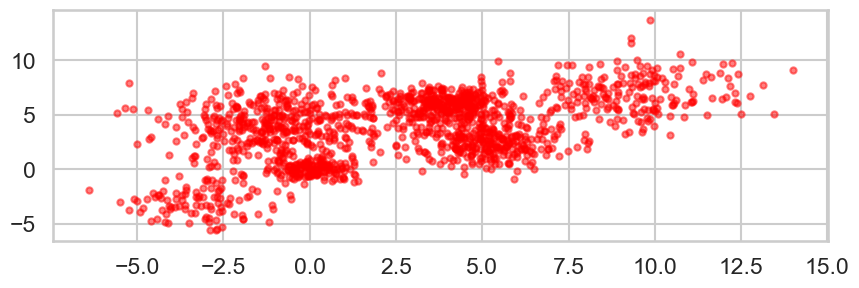

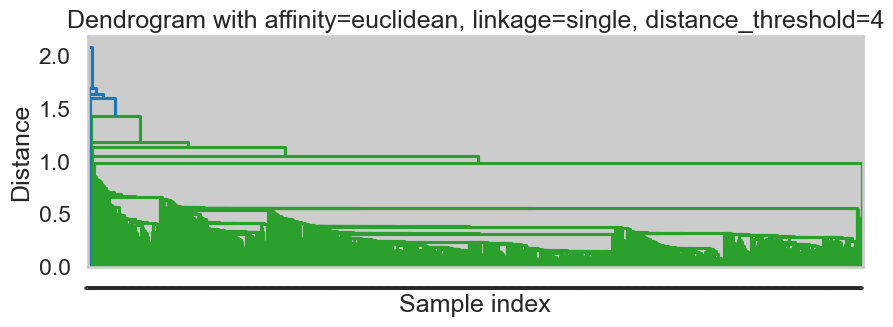

There is only 1 label for affinity=euclidean, linkage=single, distance_threshold=4
1


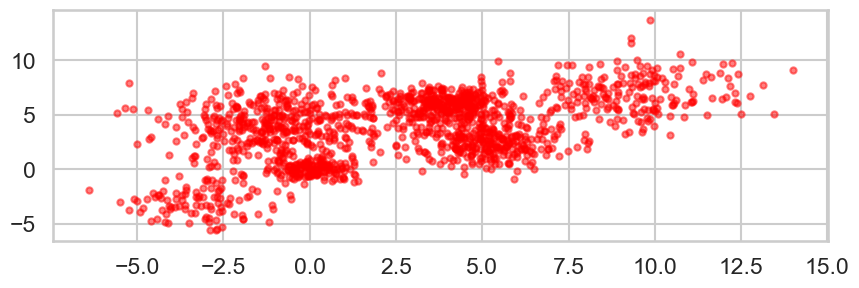

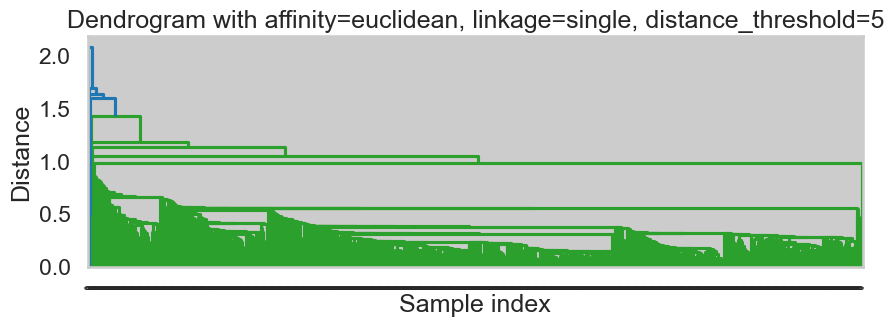

There is only 1 label for affinity=euclidean, linkage=single, distance_threshold=5
1


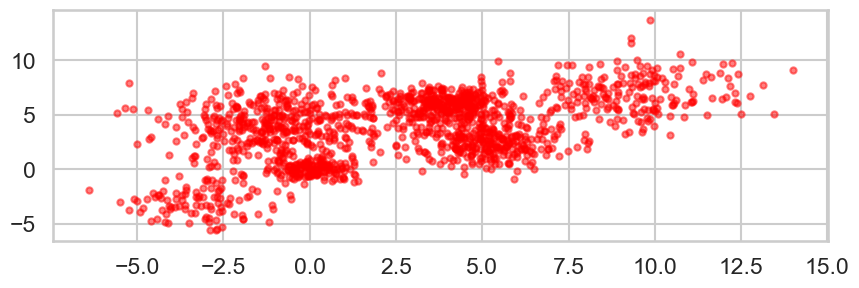

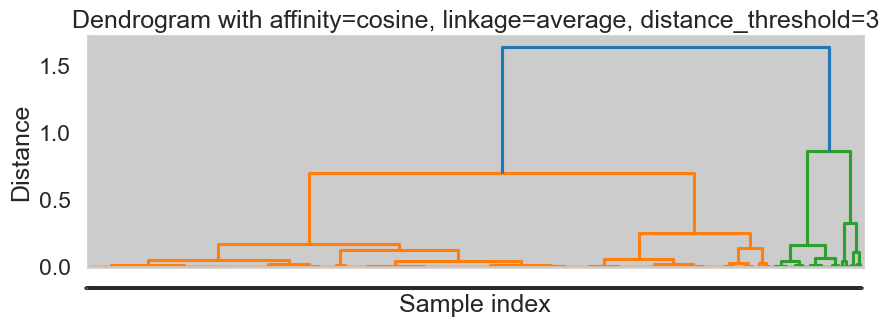

There is only 1 label for affinity=cosine, linkage=average, distance_threshold=3
1


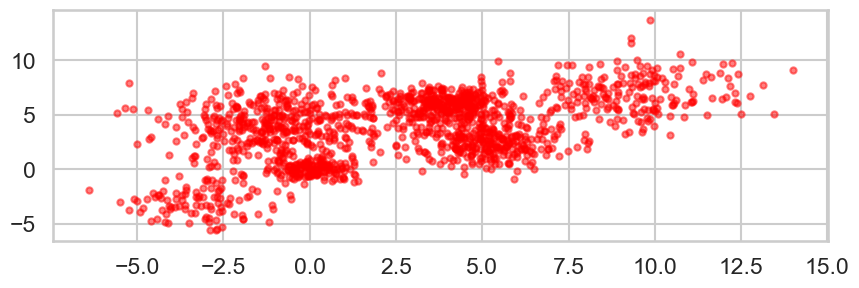

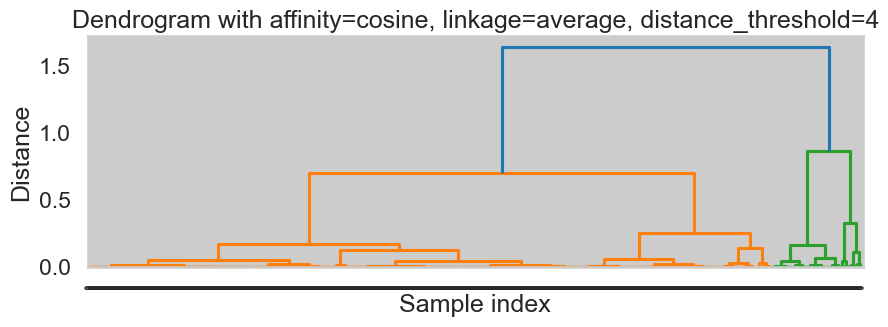

There is only 1 label for affinity=cosine, linkage=average, distance_threshold=4
1


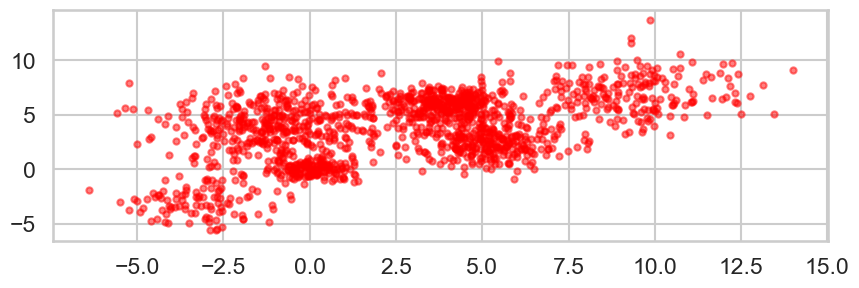

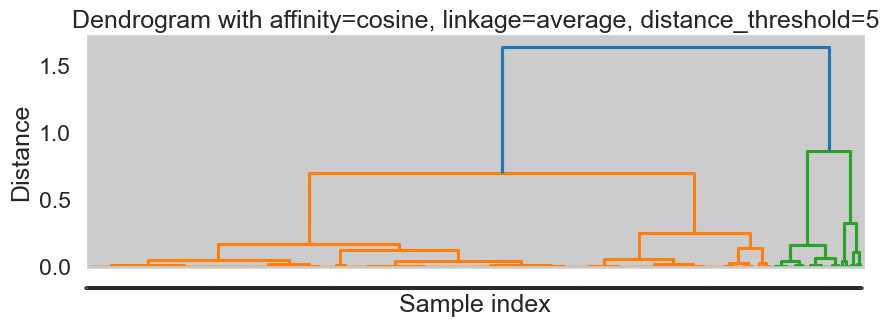

There is only 1 label for affinity=cosine, linkage=average, distance_threshold=5
1


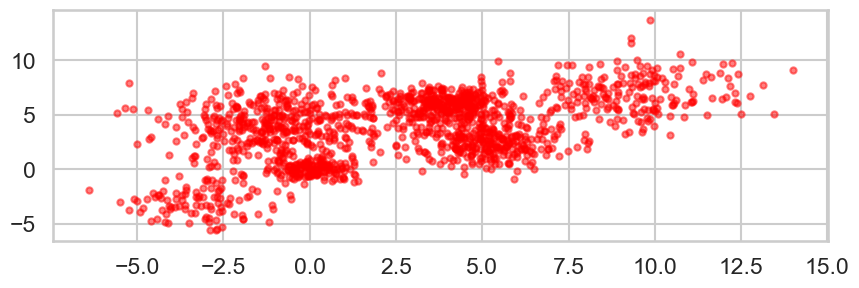

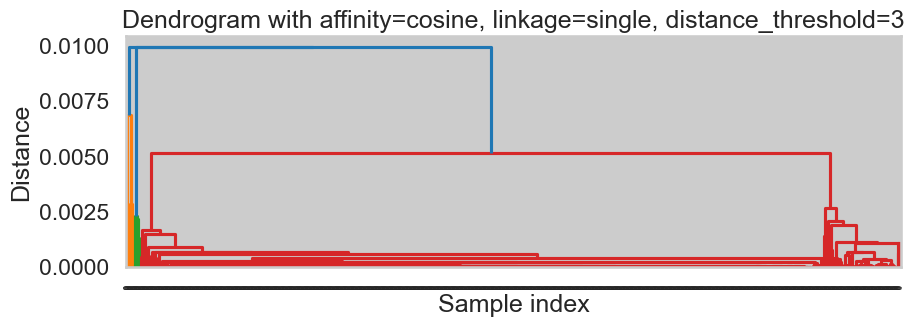

There is only 1 label for affinity=cosine, linkage=single, distance_threshold=3
1


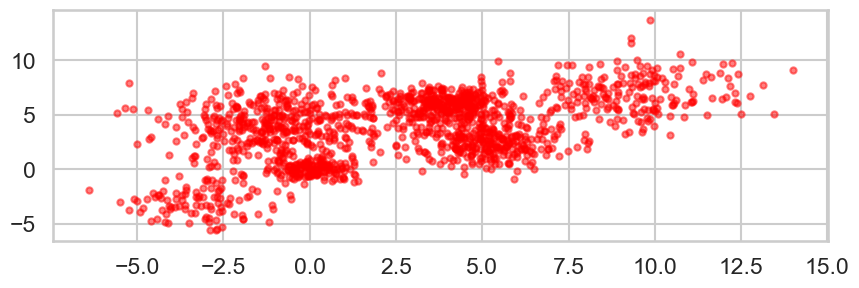

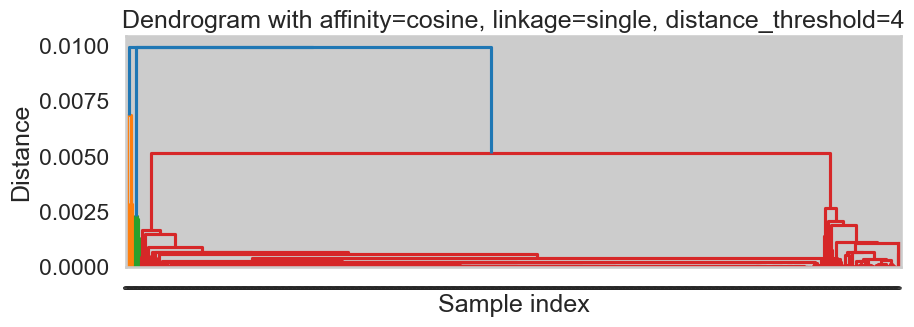

There is only 1 label for affinity=cosine, linkage=single, distance_threshold=4
1


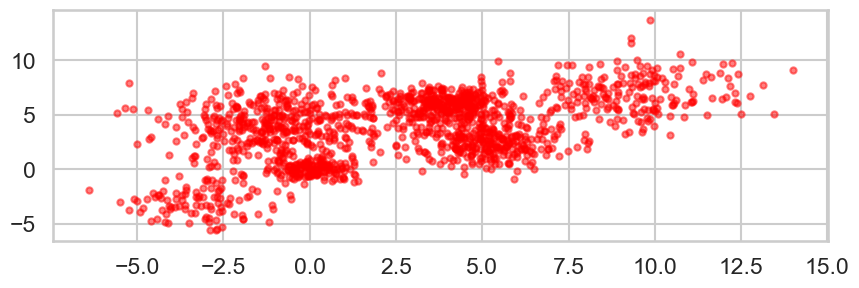

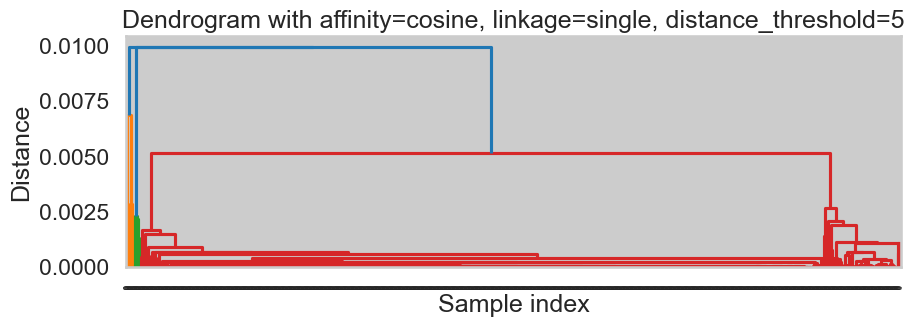

There is only 1 label for affinity=cosine, linkage=single, distance_threshold=5
Best silhouette score: 0.433 with affinity=euclidean, linkage=average, distance_threshold=5


In [19]:
X=Multi_blob_Data

affinity_list = ['euclidean','cosine'] # 'manhattan' is removed as it is not supported in linkage class
linkage_list = ['average', 'single']
distance_list = [3, 4, 5]

best_score = -1
best_affinity = ''
best_linkage = ''
best_distance = 0

for affinity_type in affinity_list:
    for linkage_type in linkage_list:
        for distance in distance_list:
            #add conditions to adjust distance_threshold based on the affinity and linkage type
            agglo = AgglomerativeClustering(n_clusters=None, affinity=affinity_type, linkage=linkage_type, distance_threshold=distance)
            agglo.fit(X)
            print(len(np.unique(agglo.labels_)))
            # add a condition to remove manhattan type
            linkage_matrix = linkage(X, method=linkage_type, metric=affinity_type)
            display_cluster(X,km=agglo,num_clusters=len(np.unique(agglo.labels_)))
                
            plt.figure(figsize=(10, 3))
            dendrogram(linkage_matrix,labels=agglo.labels_)
            plt.title(f'Dendrogram with affinity={affinity_type}, linkage={linkage_type}, distance_threshold={distance}')
            plt.xlabel('Sample index')
            plt.ylabel('Distance')
            plt.show()
            
            if len(np.unique(agglo.labels_)) == 1:
                print(f'There is only 1 label for affinity={affinity_type}, linkage={linkage_type}, distance_threshold={distance}')
                continue
            score = silhouette_score(X, agglo.labels_)
            print(f'Silhouette score with affinity={affinity_type}, linkage={linkage_type}, distance_threshold={distance}: {score:.3f}')

            if score > best_score:
                best_score = score
                best_affinity = affinity_type
                best_linkage = linkage_type
                best_distance = distance
            


print(f'Best silhouette score: {best_score:.3f} with affinity={best_affinity}, linkage={best_linkage}, distance_threshold={best_distance}')



### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [65]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']


['setosa', 'versicolor', 'virginica']

* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

## Customer dataset
Repeat all the above on the customer data set 